<a href="https://colab.research.google.com/github/GergelyTuri/tFC-rig/blob/main/Software/processing_behavior/Colab_trace_fear_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab notebook for analyzing head fixed trace fear conditioning data
* 11/28/2023 setup

In [1]:
!git clone https://github.com/GergelyTuri/tFC-rig.git

Cloning into 'tFC-rig'...
remote: Enumerating objects: 535, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 535 (delta 143), reused 177 (delta 80), pack-reused 286
Receiving objects: 100% (535/535), 20.74 MiB | 33.65 MiB/s, done.
Resolving deltas: 100% (281/281), done.


In [ ]:
# %cd /content/tFC-rig/
# !git pull

In [14]:
import sys
from os.path import join
import pandas as pd
import subprocess
sys.path.append('/content/tFC-rig/Software/processing_behavior/')
import processing as pr

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Setting up a file to be processed

In [2]:
recordings = '/gdrive/Shareddrives/Turi_lab/Data/aging_project/'
json_file = '74_5/2023_11_22/Session 1/74-5_2023-11-22_10-46-46.json'
file_path = join(recordings, json_file)

## Parsing the raw recording file

In [3]:
command = f'python /content/tFC-rig/Software/processing_behavior/process_json.py -f "{file_path}"'
subprocess.run(command, shell=True)

CompletedProcess(args='python /content/tFC-rig/Software/processing_behavior/process_json.py -f "/gdrive/Shareddrives/Turi_lab/Data/aging_project/74_5/2023_11_22/Session 1/74-5_2023-11-22_10-46-46.json"', returncode=0)

## Analyzing that one file.

In [4]:
processed_file = file_path.split(".")[0] + "_processed.json"

'/gdrive/Shareddrives/Turi_lab/Data/aging_project/74_5/2023_11_22/Session 1/74-5_2023-11-22_10-46-46_processed.json'

In [5]:
session = pr.Processing(processed_file)
trials = session.trials
header = session.header
data = session.session_data

In [7]:
trial_df, trial_type = session.prepropcess_trial("Trial_1")
trial_df.head()

,session_millis,trial_millis,message,absolute_time,negative_signal_start,negative_signal_end,positive_signal_start,positive_signal_end,negative_signal,airpuff_start,airpuff_end,lick,water
time,,,,,,,,,,,,,
1970-01-01 00:00:00.000,40360,0,Trial has started,2023-11-22_10-47-30.946288,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:00.000,40393,0,Printing trial parameters,2023-11-22_10-47-31.000578,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:00.000,40435,0,randomInterTrialInterval: 76937,2023-11-22_10-47-31.055576,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:00.000,40483,0,currentTrialType: 0,2023-11-22_10-47-31.107388,False,False,False,False,False,False,False,False,False
1970-01-01 00:00:07.537,48051,7537,Lick,2023-11-22_10-47-37.964434,False,False,False,False,False,False,False,True,False


### plotting trial or session data for visual inspection

<Axes: title={'center': 'Trial#: Trial_6, Trial type: 0'}, xlabel='Time (s)', ylabel='Event (1 if Lick/Water Present)'>

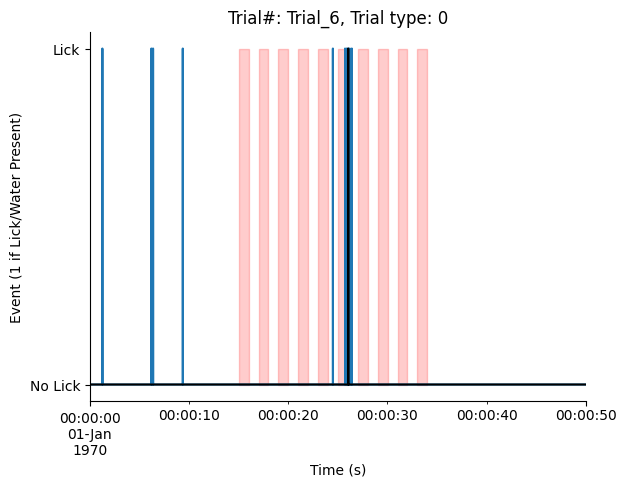

In [8]:
session.plot_trial("Trial_6")

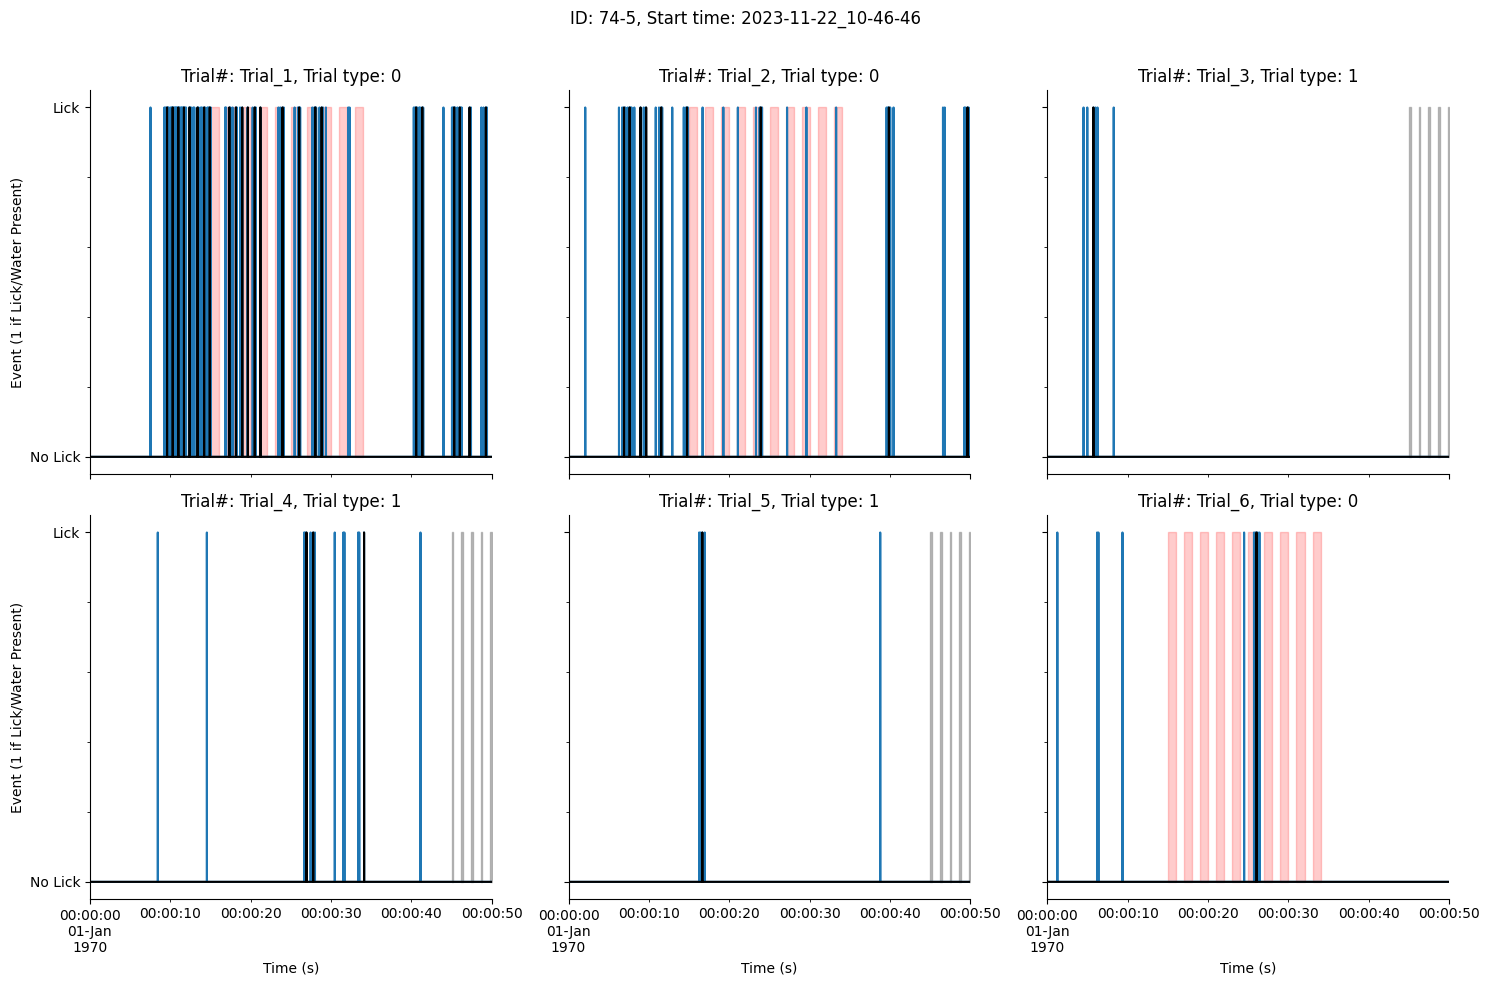

In [10]:
plot_file = processed_file.split(".")[0] + "_session.png"
fig, _ = session.plot_session()
fig.savefig(plot_file, bbox_inches='tight', dpi=300)

## Quantitiative analysis

#### Trial analysis

In [11]:
lick_rate = session.rate_calulator("Trial_1", "Lick")
lick_rate

{'event': 'Lick',
 'frequency': 1.8399632007359854,
 'count': 92,
 'duration': 50.001,
 'trial_type': '0'}

In [12]:
reward_rate = session.rate_calulator("Trial_1", "Water on")
reward_rate

{'event': 'Water on',
 'frequency': 0.4799904001919962,
 'count': 24,
 'duration': 50.001,
 'trial_type': '0'}

#### Session analysis

In [15]:
results = []

for trial in trials:
    licks = session.rate_calulator(trial, "Lick")
    reward_rate = session.rate_calulator(trial, "Water on")

    combined_results = {f"lick_{k}": v for k, v in licks.items()}
    combined_results.update({f"water_{k}": v for k, v in reward_rate.items()})
    combined_results["Trial"] = trial

    results.append(combined_results)

result_df = pd.DataFrame(results)
result_df.set_index("Trial", inplace=True)
result_df

,lick_event,lick_frequency,lick_count,lick_duration,lick_trial_type,water_event,water_frequency,water_count,water_duration,water_trial_type
Trial,,,,,,,,,,
Trial_1,Lick,1.839963,92,50.001,0,Water on,0.479990,24,50.001,0
Trial_2,Lick,0.859983,43,50.001,0,Water on,0.179996,9,50.001,0
Trial_3,Lick,0.119998,6,50.001,1,Water on,0.020000,1,50.001,1
Trial_4,Lick,0.299994,15,50.001,1,Water on,0.059999,3,50.001,1
Trial_5,Lick,0.099998,5,50.001,1,Water on,0.020000,1,50.001,1
Trial_6,Lick,0.199996,10,50.001,0,Water on,0.020000,1,50.001,0


Saving data

In [17]:
analyzed_file = file_path.split(".")[0] + "_analyzed.json"
result_df.to_json(analyzed_file, orient="table", date_format="iso")